In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

-0.9999999999999998


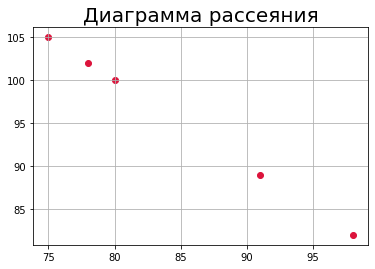

In [ ]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

print(np.corrcoef(street, garage)[0, 1])

plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.scatter(street, garage, marker='o', color='crimson')

In [4]:
data = pd.read_csv('drive/MyDrive/bitcoin.csv')

dataLinear = data.drop(data.index[-16:])
dataLinear

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...,...
1980,1980,2021-05-22,38841.92,35287.71,37350.39,74964.98,2.808008e+09,37491.50
1981,1981,2021-05-23,38304.55,31157.18,37491.50,131584.71,4.494414e+09,34716.84
1982,1982,2021-05-24,39945.35,34467.32,34716.84,106765.14,3.981461e+09,38837.76
1983,1983,2021-05-25,39842.90,36509.09,38837.76,66530.67,2.529569e+09,38387.36


0.9984361997250607


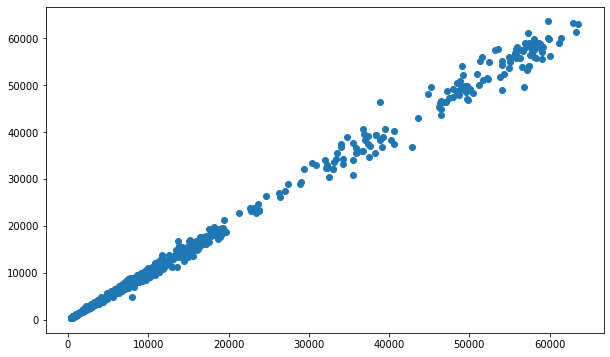

[[0.99984545]]
[20.96846044]


In [5]:
print(np.corrcoef(dataLinear['open'], dataLinear['close'])[0, 1])

X = pd.DataFrame(dataLinear, columns=['open'])
Y = pd.DataFrame(dataLinear, columns=['close'])
X = np.array(X, type(float))
Y = np.array(Y, type(float))

plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.show()

regression = LinearRegression()
regression.fit(X, Y)
print(regression.coef_)
print(regression.intercept_)

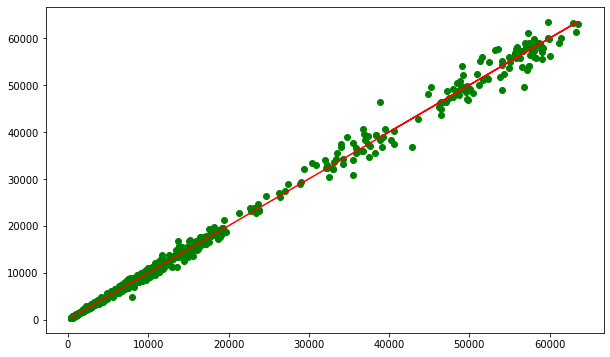

0.9999974055133096


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color = 'green')
plt.plot(Y, regression.predict(Y), color='red')
plt.show()

print(r2_score(Y, regression.predict(Y)))

In [6]:
data = pd.read_csv('drive/MyDrive/housePrice.csv')
for index, row in data.iterrows():
  if "," in data['Area'][index]:
    data.drop([index], inplace=True)

data['Area'] = data['Area'].astype(float)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.drop_duplicates(keep = 'first', inplace = True)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

print('-----------------------')
data.drop(['Address'], axis = 1, inplace=True)

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

Повторяющиеся строки : 
        Area  Room  Parking  Warehouse  Elevator            Address  \
55     61.0     1     True       True     False              Punak   
78     74.0     2     True       True      True            Amirieh   
79     88.0     3    False      False      True             Parand   
80     63.0     1     True       True      True              Punak   
81    114.0     3     True       True      True         Sattarkhan   
...     ...   ...      ...        ...       ...                ...   
3449   80.0     2     True       True      True              Punak   
3451   88.0     2     True       True      True  Central Janatabad   
3459   80.0     2     True       True      True        Ostad Moein   
3461   55.0     1     True       True      True              Punak   
3476   75.0     2    False      False     False             Parand   

             Price  Price(USD)  
55    2.030000e+09    67666.67  
78    1.700000e+09    56666.67  
79    5.600000e+08    18666.67  
80

In [ ]:
data.dtypes

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Price         float64
Price(USD)    float64
dtype: object

In [7]:
X = pd.DataFrame(data, columns=['Area'])
Y = pd.DataFrame(data, columns=['Price'])
X = np.array(X, type(float))
Y = np.array(Y, type(float))

#estimate_coef(X, Y)
n = np.size(X)

m_x = np.mean(X)
m_y = np.mean(Y)

SS_xy = np.sum(Y*X) - n*m_y*m_x
SS_xx = np.sum(X*X) - n*m_x*m_x

b_1 = SS_xy / SS_xx
b_0 = m_y - b_1 * m_x

print(b_0, b_1)

-3591773082.8349524 84081494.3911005


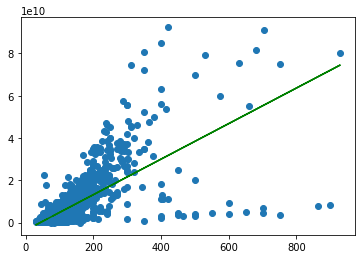

0.5198259430430094


In [ ]:
plt.scatter(X, Y, marker='o')

y_pred = b_0 + b_1 * X

plt.plot(X, y_pred, color='g')

plt.show()

print(r2_score(Y, y_pred))